## Decision Tree Classifier Practical Implementation

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
print(iris['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
##Independent Features
X = pd.DataFrame(iris['data'], columns=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'])

In [6]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
#dependent feature
y = iris['target']

In [8]:
#train-test split and plot
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [12]:
#apply Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(max_depth=2) ## We have used post pruning by defining max_depth = 2

In [13]:
tree_classifier.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.666\nsamples = 112\nvalue = [39, 35, 38]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.499\nsamples = 73\nvalue = [0, 35, 38]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.056\nsamples = 35\nvalue = [0, 1, 34]')]

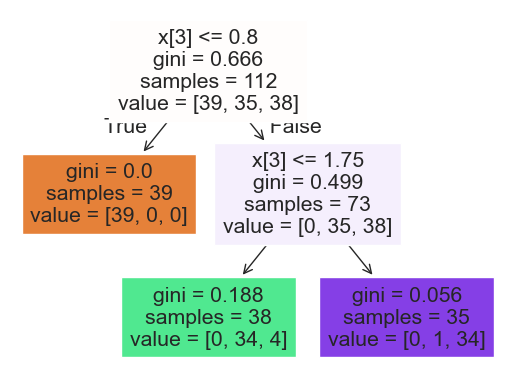

In [16]:
#Vizualize the decision tree
from sklearn import tree
# plt.figure(figsize=(10,6))
tree.plot_tree(tree_classifier, filled=True)

In [17]:
y_pred = tree_classifier.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[11  0  0]
 [ 0 15  0]
 [ 0  1 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.94      1.00      0.97        15
           2       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



## Decision Tree Classifier Pre-Puning and HyperParameter Tuning

In [26]:
param = {
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best', 'random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [27]:
param

{'criterion': ['gini', 'entropy', 'log_loss'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5],
 'max_features': ['auto', 'sqrt', 'log2']}

In [1]:
from sklearn.model_selection import GridSearchCV
treemodel = DecisionTreeClassifier()
grid = GridSearchCV(treemodel, param_grid=param, cv=5, scoring='accuracy')

NameError: name 'DecisionTreeClassifier' is not defined

In [32]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train, y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy', ...], 'max_depth': [1, 2, ...], 'max_features': ['auto', 'sqrt', ...], 'splitter': ['best', 'random']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [33]:
y_pred_grid = grid.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,y_pred_grid))
print(classification_report(y_test,y_pred_grid))

[[11  0  0]
 [ 0 15  0]
 [ 0  1 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.94      1.00      0.97        15
           2       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [35]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [36]:
grid.best_score_

np.float64(0.9466403162055336)